In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('nginx_logs.csv')
dataset.head()

,Host,Date,Page/File,URL parameter,Bandwidth,Response Code,Request Method,Referrers,User Agent,User,Virtual Domain,Cookie
0,172.1.5.56 (United States),2020-06-11 10:00:33.000,/,NaN,NaN,200 - OK,HEAD,No Referrer,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,NaN,NaN
1,172.1.5.56 (United States),2020-06-11 10:01:53.000,/banner/ajax/load/,requesting_page_url=https%3A%2F%2Ffreestylelib...,94,200 - OK,GET,https://freestylelibre.com.sg/freestyle-libre-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; ...,NaN,NaN,NaN
2,172.1.6.5 (United States),2020-06-11 10:02:21.000,/products/freestyle-libre-sensor.html,NaN,32.81 KB,200 - OK,GET,No Referrer,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4...,NaN,NaN,NaN
3,172.1.5.56 (United States),2020-06-11 10:02:54.000,/,NaN,NaN,200 - OK,HEAD,No Referrer,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,NaN,NaN
4,172.1.6.5 (United States),2020-06-11 10:03:45.000,/,NaN,NaN,200 - OK,HEAD,No Referrer,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,NaN,NaN


In [4]:
#first we encode all string into int for our model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
df4=dataset.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [6]:
df4.head()

,Host,Date,Page/File,URL parameter,Bandwidth,Response Code,Request Method,Referrers,User Agent,User,Virtual Domain,Cookie
0,0,90675,0,577,2052,0,1,24,3362,67,0,0
1,0,90678,1092,17254,1976,0,0,1928,2351,67,0,0
2,1,90679,4138,577,1083,0,0,24,2565,67,0,0
3,0,90681,0,577,2052,0,1,24,3362,67,0,0
4,1,90682,0,577,2052,0,1,24,3362,67,0,0


In [29]:
#droping null columns
new_df1=df4.drop(["Virtual Domain",'Cookie','User'], axis = 1)

In [30]:
new_df1.head()

,Host,Date,Page/File,URL parameter,Bandwidth,Response Code,Request Method,Referrers,User Agent
0,0,90675,0,577,2052,0,1,24,3362
1,0,90678,1092,17254,1976,0,0,1928,2351
2,1,90679,4138,577,1083,0,0,24,2565
3,0,90681,0,577,2052,0,1,24,3362
4,1,90682,0,577,2052,0,1,24,3362


In [34]:
X = new_df1.iloc[:,:10].values

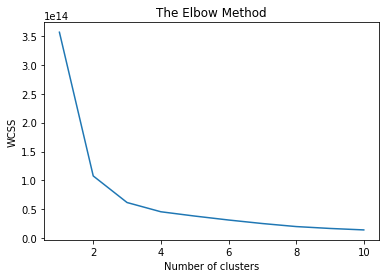

In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [39]:
#we add new column for cluster to see which row blongs to which cluster. In matplotlib cant proper 
# visualize this big data so we add new column for your help
new_df1["Clusters"] = y_kmeans
new_df1.head()

,Host,Date,Page/File,URL parameter,Bandwidth,Response Code,Request Method,Referrers,User Agent,Clusters
0,0,90675,0,577,2052,0,1,24,3362,8
1,0,90678,1092,17254,1976,0,0,1928,2351,7
2,1,90679,4138,577,1083,0,0,24,2565,8
3,0,90681,0,577,2052,0,1,24,3362,8
4,1,90682,0,577,2052,0,1,24,3362,8


In [41]:
#here you can see the all 10 cluster's centroid position with their y,x cordinates
kmeans.cluster_centers_

array([[4.91378285e-01, 1.27204408e+05, 1.79150803e+03, 3.02591020e+04,
        1.43464122e+03, 4.53085979e-02, 6.12439053e-01, 1.67112273e+03,
        2.55029849e+03, 6.70000000e+01],
       [5.03679099e-01, 3.85227066e+04, 1.54657175e+03, 1.63344591e+03,
        1.42170168e+03, 9.75486692e-01, 7.14670143e-01, 7.91166758e+02,
        2.92155876e+03, 6.70000000e+01],
       [5.07453761e-01, 1.15120996e+05, 1.72703515e+03, 1.67888023e+03,
        1.35067127e+03, 1.03404383e+00, 7.39182436e-01, 8.62444919e+02,
        2.96295062e+03, 6.67489642e+01],
       [4.95778800e-01, 6.41352265e+04, 1.55746121e+03, 1.46136499e+03,
        1.36717416e+03, 7.00361817e-01, 7.36588199e-01, 9.37768035e+02,
        2.90708612e+03, 6.70000000e+01],
       [4.96913181e-01, 1.27023960e+04, 1.41653512e+03, 1.62476393e+03,
        1.42448478e+03, 5.43237059e-01, 8.64179942e-01, 7.33581272e+02,
        2.96668972e+03, 6.70000000e+01],
       [5.01170479e-01, 1.40198068e+05, 1.81616457e+03, 1.41795618e+03,
   

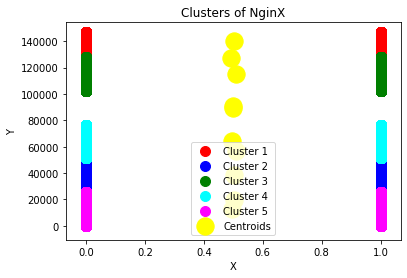

In [22]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of NginX')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

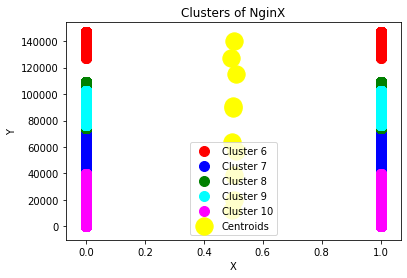

In [24]:
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'red', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'blue', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'green', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'cyan', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = 'magenta', label = 'Cluster 10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of NginX')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()